In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_predict

In [10]:
pd.set_option('display.max_columns', None)

# ingatlan adathalmaz

In [11]:
df = pd.read_csv('_data/ingatlan.csv')

In [12]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
0,Budapest,Budapest IV.,NaN,flat,prefabricated panel flat (for sale),good,3,10,garden view,east,NaN,NaN,yes,1.0,1.0,2015-02-09,35.0,0.0,9.5,702.0,23.0,7,4.0
1,Budapest,Budapest XIV.,1147.0,flat,brick flat (for sale),novel,ground floor,NaN,NaN,NaN,NaN,"gas furnace, circulating hot water",NaN,1.0,0.0,2015-02-09,35.0,0.0,11.2,42.0,6.0,8,14.0
2,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),medium,4,NaN,NaN,NaN,NaN,konvection gas burner,NaN,2.0,0.0,2015-02-09,50.0,0.0,14.5,504.0,96.0,9,14.0
3,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,50.0,0.0,15.3,39.0,1.0,11,2.0
4,Budapest,Budapest XII.,1126.0,flat,brick flat (for sale),good,ground floor,NaN,garden view,NaN,NaN,"gas furnace, circulating hot water",none,1.0,2.0,2015-02-09,50.0,0.0,17.9,114.0,27.0,13,12.0


In [13]:
df.shape

(183565, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101321 entries, 0 to 101320
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   county                   101321 non-null  object 
 1   city                     100514 non-null  object 
 2   postcode                 64928 non-null   float64
 3   property_type            101320 non-null  object 
 4   property_subtype         99541 non-null   object 
 5   property_condition_type  101320 non-null  object 
 6   property_floor           96725 non-null   object 
 7   building_floor_count     49110 non-null   object 
 8   view_type                62698 non-null   object 
 9   orientation              61485 non-null   object 
 10  garden_access            23198 non-null   object 
 11  heating_type             86860 non-null   object 
 12  elevator_type            82659 non-null   object 
 13  room_cnt                 101320 non-null  float64
 14  smal

In [16]:
df.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,district
count,115475.000000,183565.000000,182981.000000,183565.000000,175966.000000,183565.000000,183564.000000,183565.000000,183565.000000,176009.000000
mean,1103.395895,1.476393,0.547177,48.443984,7.748792,20.564001,262.264082,44.071593,196659.747942,9.730434
std,50.789818,0.972892,0.748810,12.776044,2360.665258,171.496565,556.838684,47.969011,113179.241269,4.782807
min,1011.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000
25%,1063.000000,1.000000,0.000000,40.000000,0.000000,13.200000,41.000000,11.000000,98117.000000,6.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,102.000000,28.000000,196774.000000,10.000000
75%,1141.000000,2.000000,1.000000,60.000000,3.000000,23.900000,265.000000,60.000000,294824.000000,13.000000
max,1239.000000,215.000000,56.000000,70.000000,990257.000000,41796.000000,40248.000000,544.000000,394178.000000,20.000000


In [17]:
df.describe(include='O') # only object type variables

,county,city,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,created_at
count,183565,182261,183565,179925,183565,174499,85776,100462,111423,40679,156879,150063,183565
unique,1,23,1,4,9,14,11,4,8,2,11,2,568
top,Budapest,Budapest XIV.,flat,brick flat (for sale),good,1,4,street view,east,none,konvection gas burner,yes,2015-10-20
freq,183565,20114,183565,133794,61823,34073,19855,40344,22735,34175,49623,81746,908


In [18]:
df = df.drop(['county', 'property_type', 'ad_view_cnt', 'active_days', 'nr', 'district'], axis=1)

# target_var

In [19]:
df['m2_price'] = (df['price_created_at'] / df['property_area']) * 1e6

In [20]:
df['m2_price'].describe()

count    1.835650e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.880000e+05
50%      3.760000e+05
75%      4.923077e+05
max               inf
Name: m2_price, dtype: float64

In [22]:
df.shape

(183449, 18)

In [21]:
df = df.loc[df['property_area']>0, :].reset_index(drop=True)
df = df.loc[df['m2_price']>0, :].reset_index(drop=True)

In [23]:
df.shape

(183449, 18)

In [24]:
df['m2_price'].describe()

count    1.834490e+05
mean     4.346854e+05
std      3.931615e+06
min      1.428571e+03
25%      2.876923e+05
50%      3.755556e+05
75%      4.916667e+05
max      7.954114e+08
Name: m2_price, dtype: float64

<Axes: >

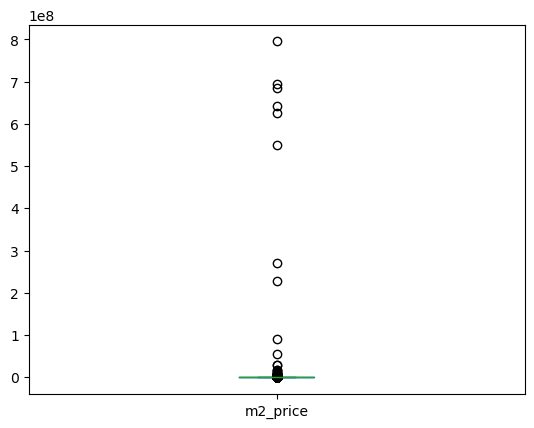

In [25]:
df['m2_price'].plot(kind='box')

<Axes: >

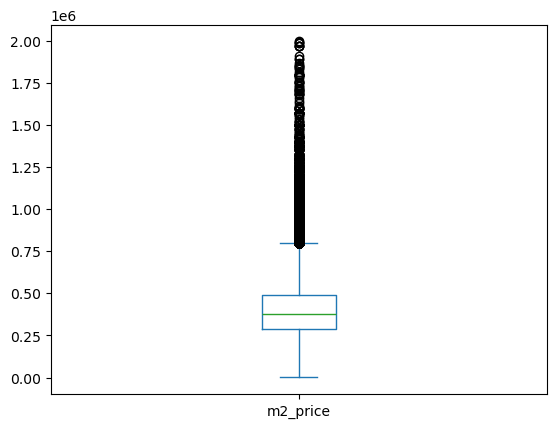

In [26]:
df.loc[df['m2_price']<2e6, 'm2_price'].plot(kind='box')

# baseline pred

In [27]:
df['pred_baseline'] = df['m2_price'].mean()

In [28]:
mean_absolute_percentage_error(df['m2_price'], df['pred_baseline'])

0.3871963174433122

# pelda prediction

In [29]:
model = LinearRegression()

In [30]:
y_col = 'm2_price'
X_cols = ['room_cnt']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=6)

In [31]:
mean_absolute_percentage_error(y, pred)

0.4098979440580843

In [32]:
df['pred'] = pred

df['ape'] = abs(df['m2_price'] - df['pred'])  / df['m2_price']

In [33]:
df['ape'].describe()

count    183449.000000
mean          0.409898
std           1.166709
min           0.000003
25%           0.137054
50%           0.296098
75%           0.545423
max         336.273762
Name: ape, dtype: float64

<Axes: >

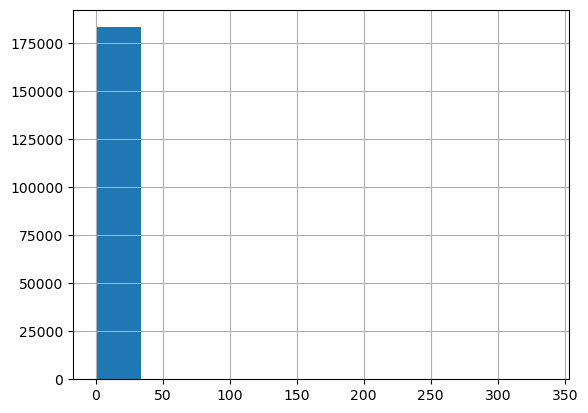

In [34]:
df['ape'].hist()

In [35]:
low_m2_price = df['m2_price']<1e5
high_m2_price = df['m2_price']>2e6

In [36]:
df.loc[low_m2_price | high_m2_price, 'ape'].describe()

count    172.000000
mean       8.446400
std       34.495538
min        0.665737
25%        0.857762
50%        0.928545
75%        4.297307
max      336.273762
Name: ape, dtype: float64

In [37]:
df.loc[~low_m2_price & ~high_m2_price, 'ape'].describe()

count    183277.000000
mean          0.402356
std           0.437700
min           0.000003
25%           0.136608
50%           0.295705
75%           0.544294
max          82.842099
Name: ape, dtype: float64

# vegyuk ki az extrem gyanus arakat

In [29]:
# df.loc[(feltetel1) & (feltetel2), [oszlopnevek]]
# | or (vagy)
# & and (es)
# ~ not (nem)

In [38]:
df = df.loc[~low_m2_price &
            ~high_m2_price,
      :].reset_index(drop=True)

In [39]:
df.shape

(183277, 21)

In [32]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=6)

In [33]:
mean_absolute_percentage_error(y, pred)

0.34730918584140225

In [34]:
df['pred'] = pred
df['ape'] = abs(df['m2_price'] - df['pred'])  / df['m2_price']

In [35]:
df['ape'].describe()

count    183277.000000
mean          0.347309
std           0.298054
min           0.000037
25%           0.132084
50%           0.275154
75%           0.475072
max           5.901628
Name: ape, dtype: float64

In [36]:
model.fit(X.sample(100, random_state=1), y.sample(100, random_state=1))

LinearRegression()

# X_cols bovites

In [37]:
X_cols += ['property_area', 'small_room_cnt']

In [38]:
df.loc[:, X_cols].isnull().sum()

room_cnt            0
property_area       0
small_room_cnt    582
dtype: int64

In [39]:
df['small_room_cnt'] = df['small_room_cnt'].fillna(0)

In [40]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=6)

In [41]:
mean_absolute_percentage_error(y, pred)

0.33889415142183216

In [42]:
df.loc[df['small_room_cnt']<0, 'small_room_cnt'] = 0

In [43]:
df['room'] = df['room_cnt'] + (df['small_room_cnt'] / 2)

In [44]:
df = df.loc[df['room']>0, :].reset_index(drop=True)

In [45]:
df['area_by_room'] = (df['property_area'] / df['room'])

In [46]:
df = df.loc[df['area_by_room']>=5, :].reset_index(drop=True)

In [47]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=6)

mean_absolute_percentage_error(y, pred)

0.3387051314332475

In [48]:
X_cols += ['balcony_area']

In [49]:
df['balcony_area'] = df['balcony_area'].fillna(0)

In [50]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=6)

mean_absolute_percentage_error(y, pred)

0.3731602847597669

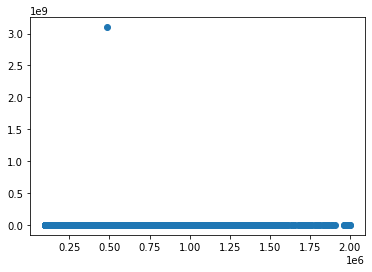

In [51]:
plt.scatter(y, pred)

In [52]:
df['pred'] = pred
df['ape'] = abs(df['m2_price'] - df['pred'])  / df['m2_price']

In [53]:
df.sort_values('ape', ascending=False).loc[:, X_cols]

,room_cnt,property_area,small_room_cnt,balcony_area
162880,3.0,65.0,0.0,990257.0
40222,1.0,10.0,0.0,0.0
99716,1.0,10.0,0.0,0.0
38307,1.0,10.0,1.0,0.0
48464,1.0,10.0,1.0,0.0
...,...,...,...,...
14249,1.0,35.0,0.0,0.0
29740,1.0,35.0,0.0,0.0
29707,1.0,35.0,0.0,0.0
29475,1.0,35.0,0.0,0.0


In [54]:
df.loc[df['balcony_area']<1e5, 'ape'].mean()

0.33827197339470044

In [55]:
df = df.loc[df['balcony_area']<df['property_area'], :].reset_index(drop=True)

In [56]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.3348684769273364

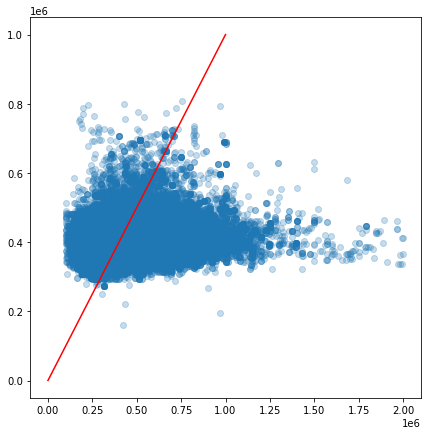

In [57]:
plt.figure(figsize=(7, 7))
plt.scatter(y, pred, alpha=0.25)
plt.plot([0,1e6], [0, 1e6], color='r')

# property subtype

In [58]:
df['property_subtype'].value_counts()

brick flat (for sale)                  133168
prefabricated panel flat (for sale)     46067
terraced house                              2
prefabricated panel flat (for rent)         1
Name: property_subtype, dtype: int64

In [59]:
usable_subtypes = ['brick flat (for sale)', 'prefabricated panel flat (for sale)']

In [60]:
df = df.loc[df['property_subtype'].isin(usable_subtypes), :].reset_index(drop=True)

In [61]:
df['property_subtype'] = df['property_subtype'].apply(lambda x: 1 if x == 'brick flat (for sale)' else 0)

In [62]:
X_cols += ['property_subtype']

In [63]:
df.loc[:, X_cols].isnull().sum()

room_cnt            0
property_area       0
small_room_cnt      0
balcony_area        0
property_subtype    0
dtype: int64

In [64]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.2921080132596165

# kerulet dummy

In [65]:
city_dummies = pd.get_dummies(df['city'], prefix='city', drop_first=True)

In [66]:
df = pd.concat([df, city_dummies], axis=1)

In [67]:
X_cols += city_dummies.columns.tolist()

In [68]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.22292493259422483

# heating dummy

In [69]:
df['heating_type'].value_counts()

konvection gas burner                 49097
gas furnace, circulating hot water    34179
district heating                      28902
central heating with own meter        18984
central heating                       12034
electric                               4864
tile stove (gas)                       2976
other                                  2119
fan-coil                                295
gas furnace                              21
gas + solar                               1
Name: heating_type, dtype: int64

In [70]:
rare_heating_types = df['heating_type'].value_counts()[df['heating_type'].value_counts()<2e3].index

In [71]:
df.loc[df['heating_type'].isin(rare_heating_types), 'heating_type'] = 'other'

In [72]:
df['heating_type'].value_counts()

konvection gas burner                 49097
gas furnace, circulating hot water    34179
district heating                      28902
central heating with own meter        18984
central heating                       12034
electric                               4864
tile stove (gas)                       2976
other                                  2436
Name: heating_type, dtype: int64

In [73]:
heating_dummies = pd.get_dummies(df['heating_type'], prefix='heating', drop_first=True)

In [74]:
df = pd.concat([df, heating_dummies], axis=1)

In [75]:
X_cols += heating_dummies.columns.tolist()

In [76]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.2116690520493343

# condition labeling

In [77]:
df['property_condition_type'].value_counts()

good                  60228
novel                 36347
renewed               27721
medium                25147
to_be_renovated       13991
missing_info           7941
new_construction       6828
can_move_in            1003
under_construction       29
Name: property_condition_type, dtype: int64

In [78]:
condition_dict = {
    'missing_info':1,
    'under_construction':1,
    'to_be_renovated':2,
    'can_move_in':3,
    'medium':3,
    'good':4,
    'renewed':4,
    'novel':5,
    'new_construction':5
}

In [79]:
df['property_condition_type'] = df['property_condition_type'].map(condition_dict)

In [80]:
X_cols += ['property_condition_type']

In [81]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.2050238846119355

# elevator

In [82]:
df['elevator_type'].value_counts(dropna=False)

yes     79628
none    66677
NaN     32930
Name: elevator_type, dtype: int64

In [83]:
elevator_map = df.groupby(['property_subtype', 'elevator_type']).size().unstack().idxmax(axis=1)

In [84]:
df.loc[df['elevator_type'].isnull(), 'elevator_type'] =\
df.loc[df['elevator_type'].isnull(), 'property_subtype'].map(elevator_map)

In [85]:
df['elevator_type'].value_counts(dropna=False)

none    93830
yes     85405
Name: elevator_type, dtype: int64

In [86]:
df['elevator_type'] = df['elevator_type'].apply(lambda x: 1 if x=='yes' else 0)

In [87]:
X_cols += ['elevator_type']

In [88]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.20389615193498004

# property_floor

In [89]:
df['property_floor'].value_counts(dropna=False)

1                  33516
2                  29378
ground floor       28589
3                  24399
4                  14384
NaN                 8764
mezzanine floor     8610
5                   7955
6                   5620
7                   4257
8                   3897
10                  3849
9                   3803
10 plus             1152
basement            1062
Name: property_floor, dtype: int64

In [90]:
floor_map = {
    'ground floor': 0,
    'mezzanine floor': 0.5,
    '10 plus': 11,
    'basement': -1
}

In [91]:
df.loc[df['property_floor'].isin(floor_map.keys()), 'property_floor'] =\
df.loc[df['property_floor'].isin(floor_map.keys()), 'property_floor'].map(floor_map)

In [92]:
df['property_floor'] = df['property_floor'].astype(float)

In [93]:
df['property_floor'] = df['property_floor'].fillna(df['property_floor'].mean())

In [94]:
X_cols += ['property_floor']

In [95]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

pred = cross_val_predict(model, X, y, cv=4)

mean_absolute_percentage_error(y, pred)

0.20409963474830653

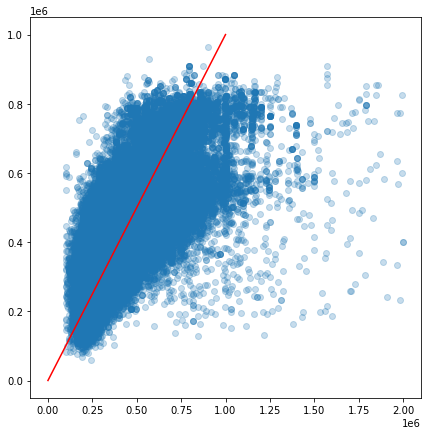

In [96]:
plt.figure(figsize=(7, 7))
plt.scatter(y, pred, alpha=0.25)
plt.plot([0,1e6], [0, 1e6], color='r')

# CONCLUSION

In [97]:
df['pred'] = pred
df['ape'] = abs(df['m2_price'] - df['pred']) / df['m2_price']

<AxesSubplot:ylabel='property_condition_type'>

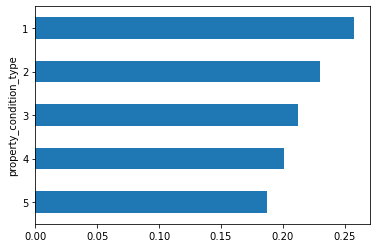

In [98]:
df.groupby('property_condition_type')['ape'].mean().sort_values().plot(kind='barh')

In [99]:
df.groupby('property_subtype')['ape'].mean()

property_subtype
0    0.167480
1    0.216767
Name: ape, dtype: float64

<AxesSubplot:ylabel='city'>

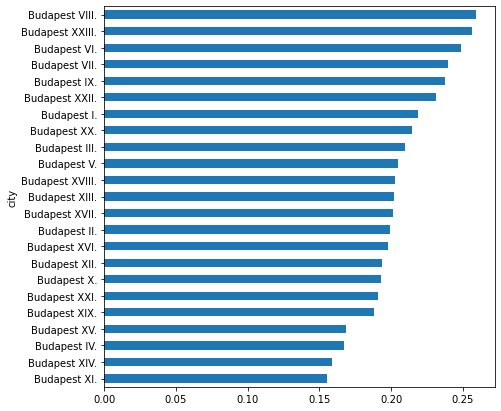

In [100]:
df.groupby('city')['ape'].mean().sort_values().plot(kind='barh', figsize=(7,7))

# RFE -  recursive feature elimination

In [101]:
from sklearn.feature_selection import RFE

In [102]:
selector = RFE(model, n_features_to_select=30, step=1)
selector.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [103]:
(abs(cross_val_predict(model, df.loc[:, X.columns[selector.support_]], y, cv=6) - y) / y).mean()

0.20725081858975025

In [104]:
(abs(cross_val_predict(model, df.loc[:, X.columns[selector.support_]], y, cv=6) - y) / y).mean()

0.20725081858975025

In [110]:
mape_list = []
for i in range(len(X.columns)):
    feat_num = i + 1
    selector = RFE(model, n_features_to_select=feat_num, step=1)
    selector.fit(X, y)
    pred = cross_val_predict(model, df.loc[:, X.columns[selector.support_]], y, cv=6)
    score = mean_absolute_percentage_error(y, pred)
    print(f'feat_num: {feat_num}, score: {score}')
    mape_list.append(score)

feat_num: 1, score: 0.3277038427905641
feat_num: 2, score: 0.3272836778253894
feat_num: 3, score: 0.3211271585547182
feat_num: 4, score: 0.2782142416913642
feat_num: 5, score: 0.273629742939881
feat_num: 6, score: 0.2686996999913785
feat_num: 7, score: 0.2648834781745415
feat_num: 8, score: 0.2615849387053346
feat_num: 9, score: 0.25551885801788243
feat_num: 10, score: 0.25482791568012025
feat_num: 11, score: 0.2544883679191882
feat_num: 12, score: 0.2530924962854864
feat_num: 13, score: 0.24905292138421553
feat_num: 14, score: 0.2444680412316414
feat_num: 15, score: 0.244156472338408
feat_num: 16, score: 0.23909363980343468
feat_num: 17, score: 0.23399104825328837
feat_num: 18, score: 0.22972326616555658
feat_num: 19, score: 0.2292504402946845
feat_num: 20, score: 0.22868669477296374
feat_num: 21, score: 0.22741076307262745
feat_num: 22, score: 0.22551614077344062
feat_num: 23, score: 0.2252284066884123
feat_num: 24, score: 0.22012207288724425
feat_num: 25, score: 0.21887360690627608


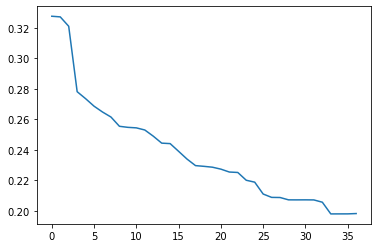

In [111]:
plt.plot(mape_list)